<a href="https://colab.research.google.com/github/funny4875/1-50/blob/master/%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98_kerasCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.shape(x_train[56][0])

(28, 28)

In [ ]:
 #-*- coding: utf-8 -*-
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd 

In [ ]:
26*16

416

In [ ]:
# Mnist Dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
x_train = X_train.reshape(60000, 28, 28, 1)/255
x_test = X_test.reshape(10000, 28, 28, 1)/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',  
              input_shape=(28,28,1),  
              activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPool2D(pool_size=(2,2)))  
# Create CN layer 2  
model.add(Conv2D(filters=36,kernel_size=(3,3),  
        padding='same',input_shape=(14,14,1),activation='relu'))  

# Create Max-Pool 2  
model.add(MaxPool2D(pool_size=(2,2)))  
# Add Dropout layer  
model.add(Dropout(0.25))  
# 建立平坦層 
model.add(Flatten()) 
# hidden layer
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))
# 建立輸出層 
model.add(Dense(10, activation='softmax'))  
print(model.summary())

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________

In [ ]:
16*(5*5) +16

160

In [ ]:
16*(3*3)*36 +36

5220

In [ ]:
# Train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)
# Test
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))



Epoch 1/10
938/938 [==============================] - 12s 6ms/step - loss: 0.5612 - accuracy: 0.8219
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1049 - accuracy: 0.9696
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0750 - accuracy: 0.9766
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0597 - accuracy: 0.9818
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0574 - accuracy: 0.9833
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0519 - accuracy: 0.9842
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0447 - accuracy: 0.9858
Epoch 8/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0395 - accuracy: 0.9879
Epoch 9/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0392 - accuracy: 0.9873
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.993

In [ ]:
i=1
for layer in model.layers:
  print("Layer:"+str(i)+"\n"+str(layer.input)+"\n"+str(layer.output))
  print("-------")
  i=i+1

Layer:1
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 16), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
-------
Layer:2
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 16), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 16), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
-------
Layer:3
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 16), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 36), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1

In [ ]:
import numpy as np

weights, biases = model.layers[0].get_weights()
#0.9934999942779541  ==> 5*5 filter
#0.9933000206947327  ==> 3*3 filter
#for i in range(weights.shape[3]):
  #print(weights[:,:,:,i])
  
for i in range(10):
  x=np.reshape(x_test[i],(1,28,28,1))
  print(model.predict_classes(x))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[7]
[2]
[1]
[0]
[4]


In [ ]:
import numpy as np
from keras.models import Model
from matplotlib import pyplot
models = []
for i in range(5):
  outputs = [model.layers[i].output]
  models.append(None)
  models[i] = Model(inputs=model.inputs,outputs=outputs)
  #models.append(Model(inputs=model.inputs,outputs=outputs[i]))



In [ ]:
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_____________________________________________________________


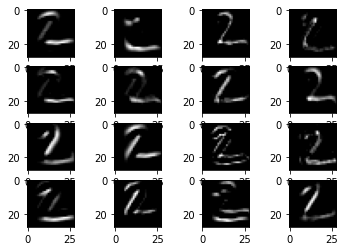

In [ ]:
#conv2d (Conv2D)              (None, 28, 28, 16)        416
import numpy as np
x = np.reshape(x_test[1],(1,28,28,1))
outputs = [model.layers[0].output]
model_conv2d = Model(inputs=model.inputs,outputs=outputs)
y = model_conv2d.predict(x)
i = 0
for i in range(16):
  pyplot.subplot(4,4,i+1)
  pyplot.imshow(y[0,:,:,i], cmap='gray')
pyplot.show()

In [ ]:
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        5220      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_____________________________________________________________

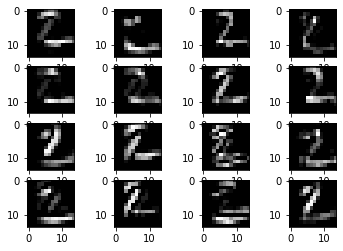

In [ ]:
#conv2d_1 (Conv2D)            (None, 14, 14, 36)        5220
import numpy as np
x = np.reshape(x_test[1],(1,28,28,1))
outputs = [model.layers[1].output]
model_max_pooling2d = Model(inputs=model.inputs,outputs=outputs)
y = model_max_pooling2d.predict(x)
i = 0
for i in range(16):
  pyplot.subplot(4,4,i+1)
  pyplot.imshow(y[0,:,:,i], cmap='gray')
pyplot.show()

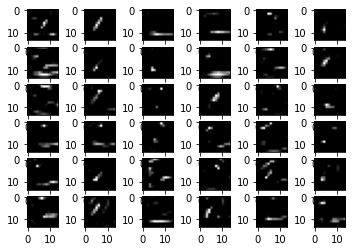

In [ ]:

#conv2d_1 (Conv2D)            (None, 14, 14, 36)        5220
import numpy as np
x = np.reshape(x_test[1],(1,28,28,1))
outputs = [model.layers[2].output]
model_conv2d_1 = Model(inputs=model.inputs,outputs=outputs)
y = model_conv2d_1.predict(x)
i = 0
for i in range(36):
  pyplot.subplot(6,6,i+1)
  pyplot.imshow(y[0,:,:,i], cmap='gray')
pyplot.show()

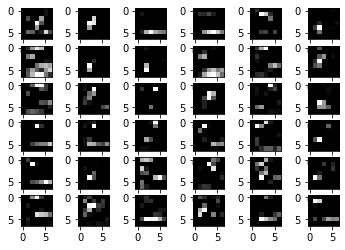

In [ ]:
#conv2d_1 (Conv2D)            (None, 14, 14, 36)        5220
import numpy as np
x = np.reshape(x_test[1],(1,28,28,1))
outputs = [model.layers[3].output]
model_max_pooling2d_1 = Model(inputs=model.inputs,outputs=outputs)
y = model_max_pooling2d_1.predict(x)
i = 0
for i in range(36):
  pyplot.subplot(6,6,i+1)
  pyplot.imshow(y[0,:,:,i], cmap='gray')
pyplot.show()

In [ ]:
#dense_1 (Dense)              (None, 10)                1290 
import numpy as np
x = np.reshape(x_test[1],(1,28,28,1))
outputs = [model.layers[8].output]
model_max_pooling2d_1 = Model(inputs=model.inputs,outputs=outputs)
y = model_max_pooling2d_1.predict(x)
print(y)

[[7.0223494e-09 4.6155257e-09 1.0000000e+00 1.1023373e-12 6.6931621e-12
  3.5598473e-16 1.3962850e-10 2.1619455e-13 5.1324713e-12 3.3742164e-16]]


In [ ]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares

In [ ]:
!cd ..;ls

bin	 datalab  home	 lib64	opt   run   swift	       tmp    var
boot	 dev	  lib	 media	proc  sbin  sys		       tools
content  etc	  lib32  mnt	root  srv   tensorflow-1.15.2  usr


In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
#weights[:,:,:,0]


In [ ]:
# Save model
#model.save("./CNN_Mnist.h5")

# Load Model
#model = load_model('./CNN_Mnist.h5')

# Display
def plot_img(n):
    plt.imshow(X_test[n], cmap='gray')
    plt.show()


def all_img_predict(model):
    print(model.summary())
    loss, accuracy = model.evaluate(x_test, y_test)
    print('Loss:', loss)
    print('Accuracy:', accuracy)
    predict = model.predict_classes(x_test)
    print(pd.crosstab(Y_test.reshape(-1), predict, rownames=['Label'], colnames=['predict']))


def one_img_predict(model, n):
    predict = model.predict_classes(x_test)
    print('Prediction:', predict[n])
    print('Answer:', Y_test[n])
    plot_img(n)

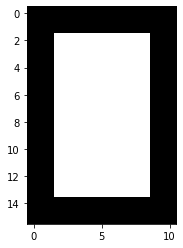

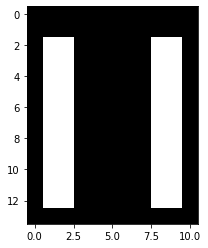

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0. 255. 255.   0.   0.   0.   0.   0. 255. 255.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [ ]:
import numpy as np
A =  [[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,255,255,255,255,255,255,255,0.0,0.0],
     [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
plt.imshow(A, cmap='gray')
plt.show()

B = np.zeros((14,11),dtype=np.float)
for i in range(1,13):
  for j in range(1,10):
    B[i][j] += abs(A[i][j-1]-A[i][j])+abs(A[i][j+1]-A[i][j])
    

plt.imshow(B, cmap='gray')
plt.show()
print(B)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction: 7
Answer: 7


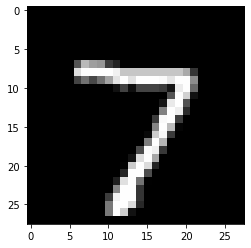

Prediction: 2
Answer: 2


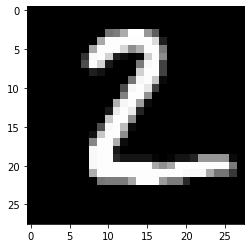

Prediction: 1
Answer: 1


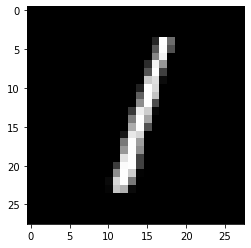

Prediction: 0
Answer: 0


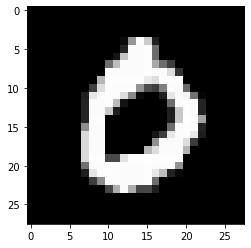

Prediction: 4
Answer: 4


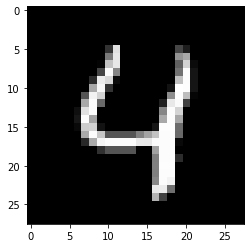

Prediction: 1
Answer: 1


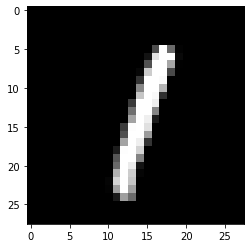

Prediction: 4
Answer: 4


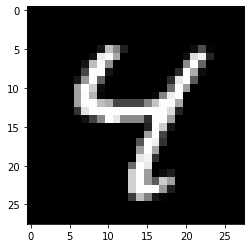

Prediction: 9
Answer: 9


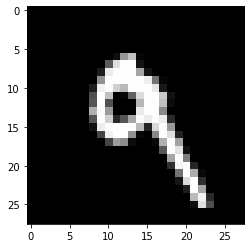

Prediction: 5
Answer: 5


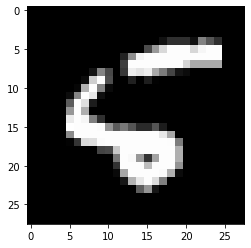

Prediction: 9
Answer: 9


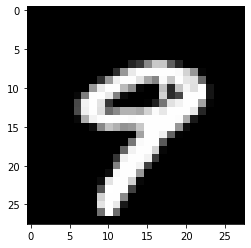

In [ ]:
for i in range(10):
  one_img_predict(model,i)

In [ ]:
all_img_predict(model)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predict    0     1     2     3    4    5    6     7    8    9
Label                                                        
0        976     0     1     0    0    0    1     0    1    1
1          0  1133     1     1    0    0    0     0    0    0
2          0     0  1029     0    0    0    0     2    1    0
3          0     0     0  1009    0    0    0     0    1    0
4          0     0     0     0  977    0    1     1    0    3
5          1     0     0     5    0  880    1     1    2    2
6          2     2     0     0    1    2  948     0    3    0
7          0     3     9     0    0    0    0  1013    1    2
8          1     0     2     1    1    1    0     0  967    1
9          0     0     1     0    4    0    0     1    5  998
